In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cmocean.cm as cmo
plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
path = '/home/jan/Data/MITgcm_test_data/'

In [35]:
ds = xr.merge([xr.open_dataset(path + 'nc_Diags/ice_diags_1m_0222.nc'), xr.open_dataset(path + 'nc_Diags/3D_diags_1m_0222.nc')]).isel(time=6)

Due to the way the 3D plotting works with matplotlib we have to cut out the region of data we want to plot before plotting. It doesn't look nice if we adjust the plotted region afterwards with `plt.xlim()`, `plt.ylim()` etc.

In [115]:
# set the x and y limits for the data to be plotted
x1 = 0.5e6
x2 = 1.5e6
y1 = 0.1e6
y2 = 2.5e6
zmax = 700

XC = ds.XC.sel(XC=slice(x1, x2))
YC = ds.YC.sel(YC=slice(y1, y2))
Z = ds.Z.sel(Z=slice(0, -zmax))
THETAsurf = ds.THETA.isel(Z=0).sel(XC=slice(x1, x2), YC=slice(y1, y2))
THETAyz = ds.THETA.where(ds.maskC == 1).sel(XC=x2, method='nearest').sel(YC=slice(y1, y2), Z=slice(0, -zmax))
THETAxz = ds.THETA.where(ds.maskC == 1).sel(YC=y1, method='nearest').sel(XC=slice(x1, x2), Z=slice(0, -zmax))
SALTyz = ds.SALT.where(ds.maskC == 1).sel(XC=x2, method='nearest').sel(YC=slice(y1, y2), Z=slice(0, -zmax))
ICEsurf = ds.SI_Fract.where(ds.SI_Fract > 0.15).sel(XC=slice(x1, x2), YC=slice(y1, y2)) #we only plot sea ice where the concentration is > 15%

Text(0.5, 0, 'depth [m]')

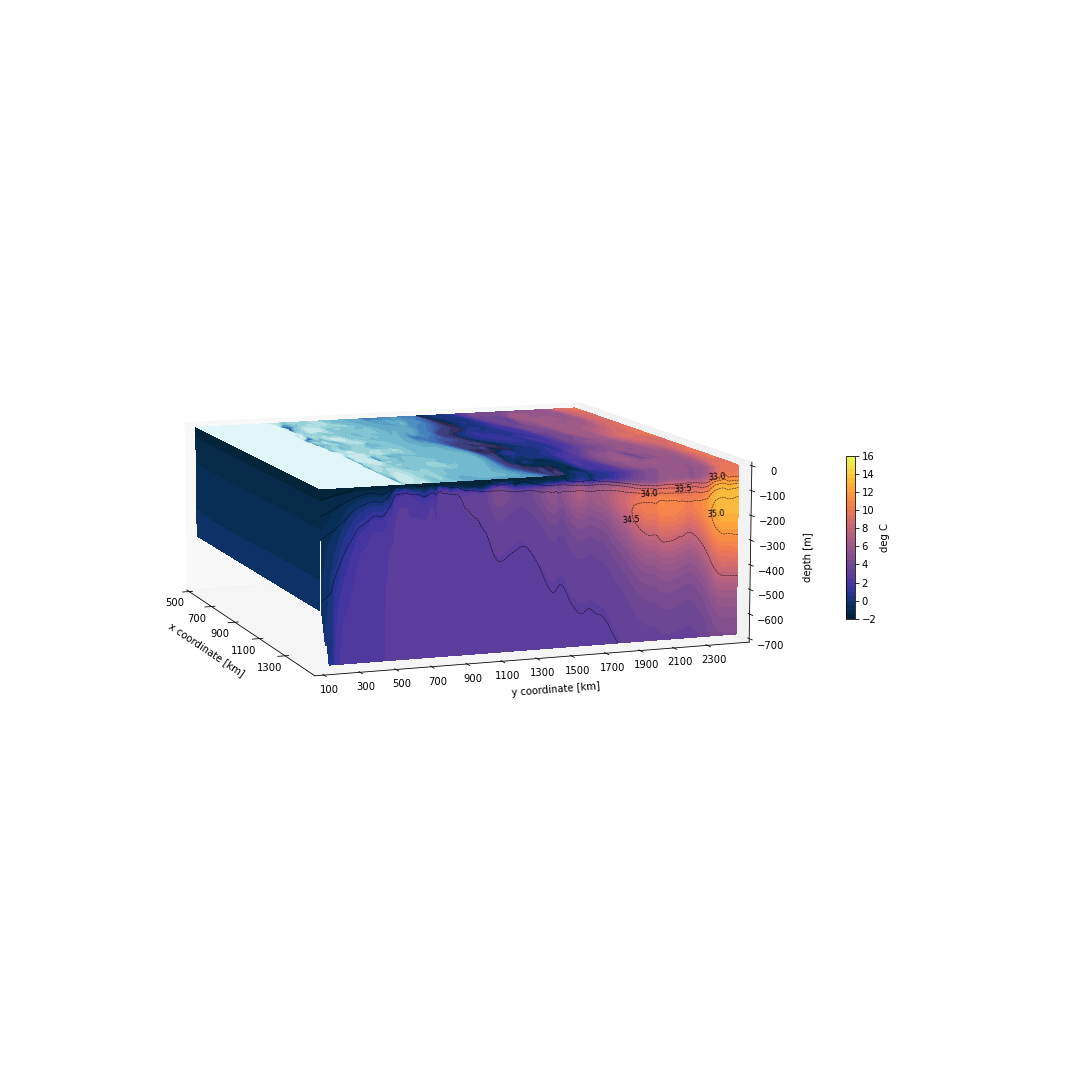

In [126]:
fig= plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
# set angles of view (up-down, left-right)
ax.view_init(10, 340)

# set levels and min/max values for different variables
THETAlevs = np.linspace(-2, 16, 37)
THETAcmap = cmo.thermal

ICElevs = np.linspace(0, 1, 21)
ICEcmap = cmo.ice

SALTlevs = np.linspace(33, 35, 5)

# plot the surface
surf1 = ax.contourf(XC, YC, THETAsurf, zdir='z', offset=0.0, cmap=THETAcmap, levels=THETAlevs)
surf2 = ax.contourf(XC, YC, ICEsurf, zdir='z', offset=0.0, cmap=ICEcmap, levels=ICElevs)

# plot the y-z plane
yz1 = ax.contourf(THETAyz, YC, Z, zdir='x', offset=x2, cmap=THETAcmap, levels=THETAlevs)
# add some contours
yz2 = ax.contour(SALTyz, YC, Z, zdir='x', offset=x2, colors='k', linewidths=0.5, linestyles='--', levels=SALTlevs)
# labeling of contours only works manually... have to be really careful not to put the labels in the wrong place
clabels = SALTlevs
ylocs = [2.3e6, 2.1e6, 1.9e6, 1.8e6, 2.3e6]
zlocs = [-50, -90, -100, -200, -200]
for clabel, y, z in zip(clabels, ylocs, zlocs):
    ax.text(x2+1e4, y, z, clabel, 'y', fontsize=8, zorder=200)

# plot the x-z plane
xz1 = ax.contourf(XC, THETAxz.T, Z, zdir='y', offset=y1, cmap=THETAcmap, levels=THETAlevs)


c1 = plt.colorbar(yz1, pad=0.1, shrink=0.2, label='deg C')

ax.set_xlim3d(x1, x2)
ax.set_ylim3d(y1, y2)
ax.set_zlim3d(-zmax, 0)
ax.grid(None)
ax.set_box_aspect((1, 1, 0.4))
plt.xticks(np.arange(x1, x2, 0.2e6), np.arange(x1 / 1e3, x2 / 1e3, 200).astype(int));
ax.set_xlabel('x coordinate [km]', labelpad=10)
plt.yticks(np.arange(y1, y2, 0.2e6), np.arange(y1 / 1e3, y2 / 1e3, 200).astype(int));
ax.set_ylabel('y coordinate [km]', labelpad=15)
ax.set_zlabel('depth [m]', labelpad=10)